<a href="https://colab.research.google.com/github/Eshikapakhale/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **KMeans Clustering- Unsupervised Machine Learning**

In [16]:
%pip install yellowbrick

In [17]:
from warnings import filterwarnings
filterwarnings("ignore")

###Step 1- Data Ingestion

In [18]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv


In [19]:
import pandas as pd
df=pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2- Basic data quality checks

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [22]:
df.duplicated().sum()

0

###Goal- To categorize simliar customers by income and spending



### Step 3-Separate X values

In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending'], dtype='object')

In [25]:
X = df[["Income", "Spending"]]



In [26]:
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Step 4 - Apply Preprocessing on X

In [27]:
X.dtypes


,0
Income,int64
Spending,int64


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler().set_output(transform="pandas")

In [30]:
X_pre = scaler.fit_transform(X)

In [31]:
X_pre[0:5]

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


###Step 5- Selecting optimum number of clusters

In [32]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

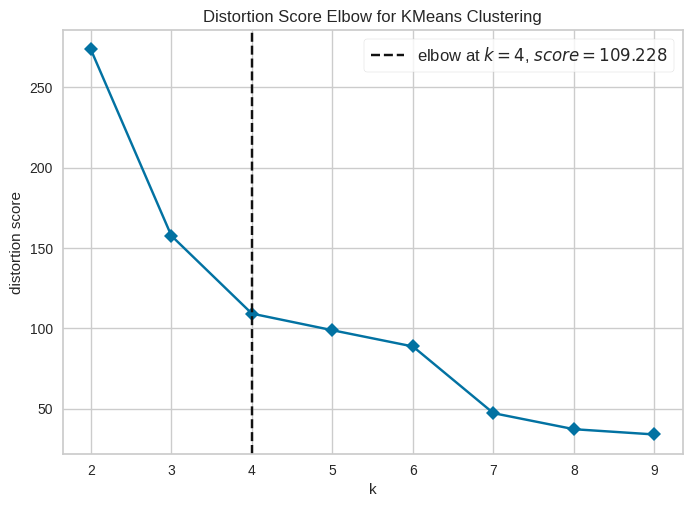

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
km = KMeans()

vis = KElbowVisualizer(km, k=(2, 10), timings=False)

vis.fit(X_pre)

vis.show()


### Optimum number of clusters to select are 5 from above graph
### Build Kmeans with nclusters = 5

In [34]:
best_kmeans = KMeans(n_clusters=5)

best_kmeans.fit(X_pre)


KMeans(n_clusters=5)

In [35]:
km_labels = best_kmeans.labels_
km_labels



array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

### Visualizing the result

In [36]:

X1 = X_pre.copy()
X1



,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [37]:
X1 = scaler.inverse_transform(X1)
X1[0:5]


array([[15., 39.],
       [15., 81.],
       [16.,  6.],
       [16., 77.],
       [17., 40.]])

In [38]:
X1 = pd.DataFrame(X1, columns=X_pre.columns)
X1.head()

,Income,Spending
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


In [39]:
X1["Cluster"] = km_labels


In [40]:
X1

,Income,Spending,Cluster
0,15.0,39.0,4
1,15.0,81.0,2
2,16.0,6.0,4
3,16.0,77.0,2
4,17.0,40.0,4
...,...,...,...
195,120.0,79.0,3
196,126.0,28.0,1
197,126.0,74.0,3
198,137.0,18.0,1


In [41]:
X1.query(f"Cluster == 0")

,Income,Spending,Cluster
43,39.0,61.0,0
46,40.0,55.0,0
47,40.0,47.0,0
48,40.0,42.0,0
49,40.0,42.0,0
...,...,...,...
121,67.0,40.0,0
122,69.0,58.0,0
126,71.0,35.0,0
132,72.0,34.0,0


In [42]:
for i in range(5):
  print(f"Cluster number : {i}")
  display(X1.query(f"Cluster == {i}"))
  print("\n==================================\n")

Cluster number : 0


,Income,Spending,Cluster
43,39.0,61.0,0
46,40.0,55.0,0
47,40.0,47.0,0
48,40.0,42.0,0
49,40.0,42.0,0
...,...,...,...
121,67.0,40.0,0
122,69.0,58.0,0
126,71.0,35.0,0
132,72.0,34.0,0




Cluster number : 1


,Income,Spending,Cluster
124,70.0,29.0,1
128,71.0,11.0,1
130,71.0,9.0,1
134,73.0,5.0,1
136,73.0,7.0,1
138,74.0,10.0,1
140,75.0,5.0,1
144,77.0,12.0,1
146,77.0,36.0,1
148,78.0,22.0,1




Cluster number : 2


,Income,Spending,Cluster
1,15.0,81.0,2
3,16.0,77.0,2
5,17.0,76.0,2
7,18.0,94.0,2
9,19.0,72.0,2
11,19.0,99.0,2
13,20.0,77.0,2
15,20.0,79.0,2
17,21.0,66.0,2
19,23.0,98.0,2




Cluster number : 3


,Income,Spending,Cluster
123,69.0,91.0,3
125,70.0,77.0,3
127,71.0,95.0,3
129,71.0,75.0,3
131,71.0,75.0,3
133,72.0,71.0,3
135,73.0,88.0,3
137,73.0,73.0,3
139,74.0,72.0,3
141,75.0,93.0,3




Cluster number : 4


,Income,Spending,Cluster
0,15.0,39.0,4
2,16.0,6.0,4
4,17.0,40.0,4
6,18.0,6.0,4
8,19.0,3.0,4
10,19.0,14.0,4
12,20.0,15.0,4
14,20.0,13.0,4
16,21.0,35.0,4
18,23.0,29.0,4


In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

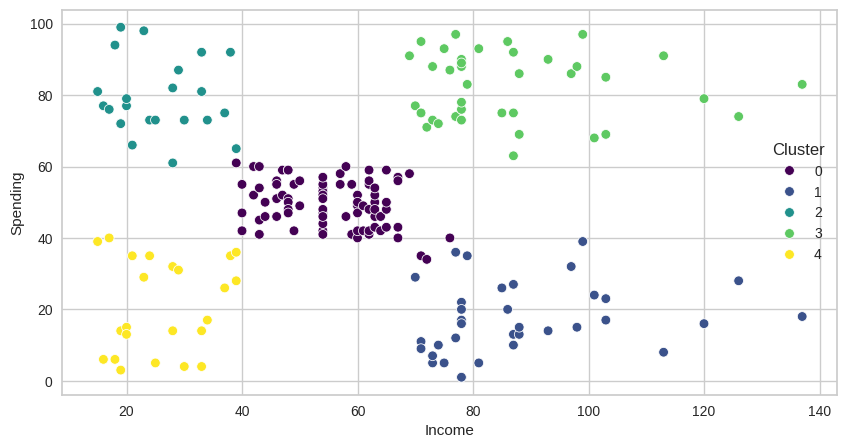

In [44]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="Cluster", palette="viridis")
plt.show()

## 2. Aglomerative clustering

In [45]:
X_pre

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [46]:
from sklearn.cluster import AgglomerativeClustering

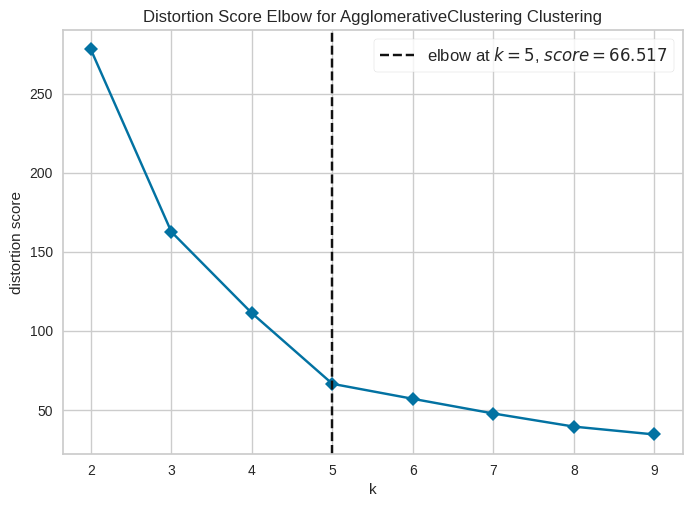

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
agc = AgglomerativeClustering()

vis2 = KElbowVisualizer(agc, k=(2, 10), timings=False)

vis2.fit(X_pre)

vis2.show()



In [48]:
best_agc = AgglomerativeClustering(n_clusters=5)

best_agc.fit(X_pre)

AgglomerativeClustering(n_clusters=5)

In [49]:
agc_labels = best_agc.labels_
agc_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [50]:
X1["Cluster2"] = agc_labels


In [51]:
X1

,Income,Spending,Cluster,Cluster2
0,15.0,39.0,4,4
1,15.0,81.0,2,3
2,16.0,6.0,4,4
3,16.0,77.0,2,3
4,17.0,40.0,4,4
...,...,...,...,...
195,120.0,79.0,3,1
196,126.0,28.0,1,0
197,126.0,74.0,3,1
198,137.0,18.0,1,0


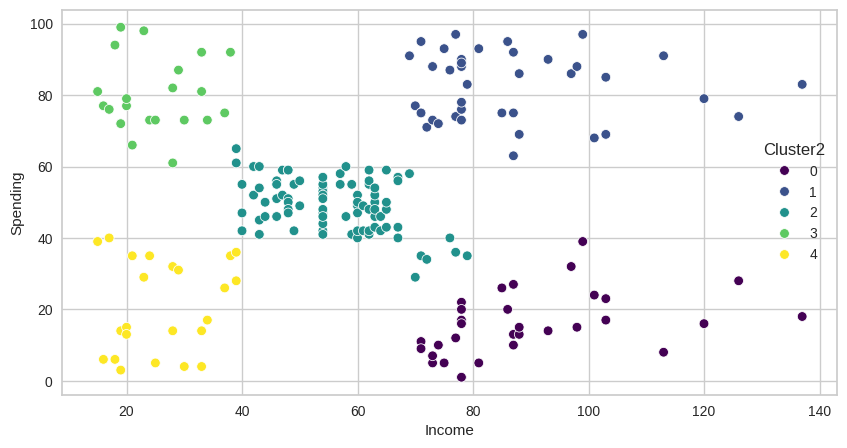

In [52]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=X1, x="Income", y="Spending", hue="Cluster2", palette="viridis")

plt.show()
